In [ ]:
import tensorflow as tf
import tensorflow.keras as keras
import tensorflow.keras.models as M
import tensorflow.keras.layers as L
from tensorflow.keras.callbacks import  ModelCheckpoint, EarlyStopping
from tensorflow.keras import optimizers
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Применение Transfer_Learning + Fine_Tuning Efficientnet 

In [3]:
# скачиваем данные train
train_df = pd.read_csv('/kaggle/input/mds-mipt-dl-test-final/fmnist_train.csv')
train_df

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784,Id
0,2,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,9,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,6,0,0,0,0,0,0,0,5,0,...,0.0,0.0,30.0,43.0,0.0,0.0,0.0,0.0,0.0,2
3,0,0,0,0,1,2,0,0,0,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,3
4,3,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17035,4,0,0,0,0,0,0,0,1,0,...,186.0,16.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,17035
17036,4,0,0,0,0,0,0,5,4,3,...,0.0,33.0,48.0,37.0,3.0,0.0,0.0,0.0,0.0,17036
17037,4,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,17037
17038,6,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,17038


In [4]:
#удаляем Nan
nan_count = train_df.isna().sum().sum()
nan_count

424

In [5]:
train_df = train_df.dropna()
train_df

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784,Id
0,2,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,9,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,6,0,0,0,0,0,0,0,5,0,...,0.0,0.0,30.0,43.0,0.0,0.0,0.0,0.0,0.0,2
3,0,0,0,0,1,2,0,0,0,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,3
4,3,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17034,1,0,0,0,0,0,0,0,0,0,...,22.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,17034
17035,4,0,0,0,0,0,0,0,1,0,...,186.0,16.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,17035
17036,4,0,0,0,0,0,0,5,4,3,...,0.0,33.0,48.0,37.0,3.0,0.0,0.0,0.0,0.0,17036
17037,4,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,17037


In [6]:
# скачиваем данные test
test_df = pd.read_csv('/kaggle/input/mds-mipt-dl-test-final/fmnist_test.csv')
test_df

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784,Id
0,0,0,0,0,0,0,0,9,8,0,...,87,56,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,14,53,99,17,...,0,0,0,63,53,31,0,0,0,2
3,0,0,0,0,0,0,0,0,0,161,...,126,140,0,133,224,222,56,0,0,3
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,0,0,0,0,0,0,0,0,37,...,23,14,20,0,0,1,0,0,0,9995
9996,0,0,0,0,0,0,0,0,0,0,...,0,0,2,52,23,28,0,0,0,9996
9997,0,0,0,0,0,0,0,0,0,0,...,172,172,182,199,222,42,0,1,0,9997
9998,0,1,3,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,9998


In [7]:
#проверяем на Nan
nan_count_test = test_df.isna().sum().sum()
nan_count_test

0

In [8]:
# Разделяем признаки и метки
X = train_df.iloc[:, 1:-1].values
y = train_df.iloc[:, 0].values



# Разбиваем данные на тренировочные и тестовые наборы
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05, random_state=42)

X_train = X_train.astype(float)
print(X_train.shape)

X_test= X_test.astype(float)
print(X_test.shape)

# Нормализуем данные
X_train = X_train.astype(np.float) / 255 
X_test = X_test.astype(np.float) / 255 

(16187, 784)
(852, 784)


/tmp/ipykernel_31/3195012888.py:17: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  X_train = X_train.astype(np.float) / 255
/tmp/ipykernel_31/3195012888.py:18: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  X_test = X_test.astype(np.float) / 255


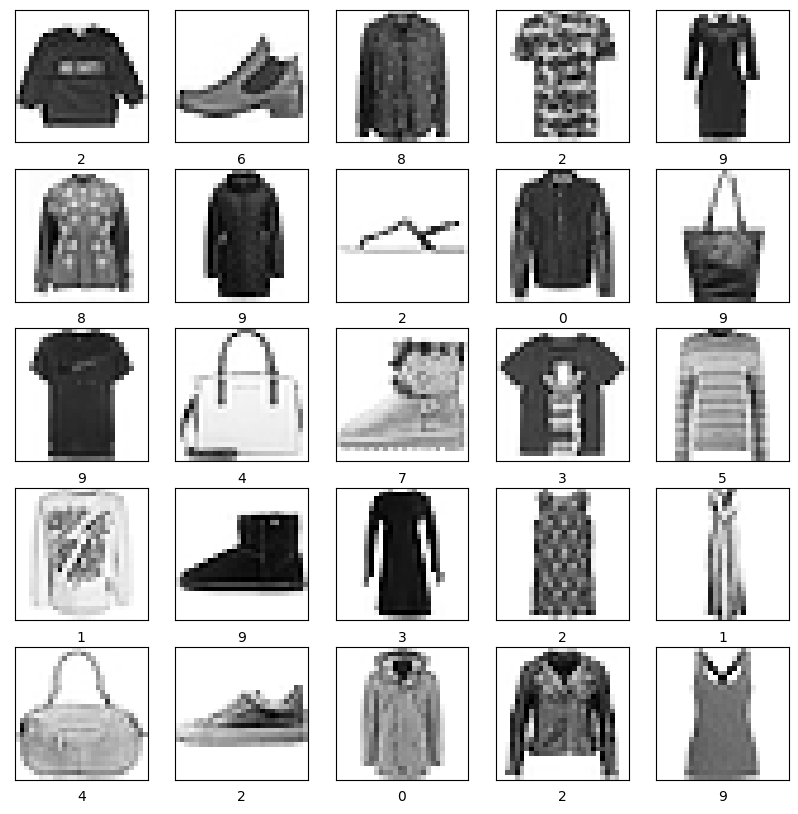

In [9]:
# Посмотрим примеры картинок
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    image = X[i].reshape(28, 28)  # Преобразуем вектор в матрицу размером 28x28
    plt.imshow(image, cmap="Greys")  # Отображаем картинку
    plt.xlabel(y_train[i])
plt.show()

In [10]:
# one-hot encode для ответов
y_train_oh = keras.utils.to_categorical(y_train, 10)
y_val_oh = keras.utils.to_categorical(y_test, 10)

print(y_train_oh.shape)
print(y_train_oh[:5], y_train[:5])

(16187, 10)
[[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]] [2 6 8 2 9]


In [11]:
X_test.shape

(852, 784)

In [12]:
#делаем преобразование в 2-мерную матрицу
X_train = np.reshape(X_train, (-1, 28, 28))
X_test = np.reshape(X_test, (-1, 28, 28))
X_train.shape

(16187, 28, 28)

In [13]:
!pip install -q efficientnet

In [14]:
#добавляем RGB для CNN
X_train = np.repeat((X_train / X_train.max()).astype("float32")[..., np.newaxis], 3, -1)
X_test = np.repeat((X_test / X_test.max()).astype("float32")[..., np.newaxis], 3, -1)

X = np.repeat((X / X.max()).astype("float32")[..., np.newaxis], 3, -1)


In [15]:
X_train.shape

(16187, 28, 28, 3)

In [16]:
#преобразуем картинку, в подходящий формат для CNN
X_train = tf.image.resize(X_train, size=(112, 112))
X_test = tf.image.resize(X_test, size=(112, 112))
X_train.shape

TensorShape([16187, 112, 112, 3])

In [17]:
#формируем базовую модель
import efficientnet.tfkeras as efn
base_model = efn.EfficientNetB7(weights='imagenet', include_top=False, input_shape=(112,112,3))

258434480/258434480 [==============================] - 4s 0us/step


In [18]:
#step 1: не обучаем модель
base_model.trainable = False

In [19]:
#формируем архитектуру
model=M.Sequential()
model.add(base_model)

model.add(L.GlobalAveragePooling2D(),)
model.add(L.Dense(10, activation='softmax'))

In [20]:
len(model.trainable_variables)

2

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnet-b7 (Functional  (None, 4, 4, 2560)       64097680  
 )                                                               
                                                                 
 global_average_pooling2d (G  (None, 2560)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 10)                25610     
                                                                 
Total params: 64,123,290
Trainable params: 25,610
Non-trainable params: 64,097,680
_________________________________________________________________


In [22]:
# Компилируем модель
from tensorflow.keras.optimizers import Adamax
model.compile(
    loss='categorical_crossentropy',  # минимизируем кросс-энтропию
    optimizer=Adamax(learning_rate = 0.001),  
    metrics=['accuracy']  # выводим процент правильных ответов
)

In [23]:
checkpoint = ModelCheckpoint('best_model.hdf5' , monitor = ['val_accuracy'] , verbose = 1  , mode = 'max')
earlystop = EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights=True)
callbacks_list = [checkpoint, earlystop]

In [24]:
# Обучаем модель на тренировочных данных
history = model.fit(X_train, y_train_oh, batch_size=32, epochs=9, validation_data = (X_test, y_val_oh),callbacks = callbacks_list)



Epoch 1/9


2023-05-25 16:59:27.961547: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential/efficientnet-b7/block1b_drop/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


506/506 [==============================] - ETA: 0s - loss: 1.2838 - accuracy: 0.6124
Epoch 1: saving model to best_model.hdf5
506/506 [==============================] - 72s 95ms/step - loss: 1.2838 - accuracy: 0.6124 - val_loss: 0.8512 - val_accuracy: 0.7430
Epoch 2/9
506/506 [==============================] - ETA: 0s - loss: 0.9093 - accuracy: 0.7122
Epoch 2: saving model to best_model.hdf5
506/506 [==============================] - 40s 80ms/step - loss: 0.9093 - accuracy: 0.7122 - val_loss: 0.6812 - val_accuracy: 0.7934
Epoch 3/9
506/506 [==============================] - ETA: 0s - loss: 0.8108 - accuracy: 0.7355
Epoch 3: saving model to best_model.hdf5
506/506 [==============================] - 40s 79ms/step - loss: 0.8108 - accuracy: 0.7355 - val_loss: 0.6241 - val_accuracy: 0.8122
Epoch 4/9
506/506 [==============================] - ETA: 0s - loss: 0.7593 - accuracy: 0.7487
Epoch 4: saving model to best_model.hdf5
506/506 [==============================] - 41s 81ms/step - loss: 0.

In [25]:
#step 2
print("Number of layers in the base model: ", len(base_model.layers))

Number of layers in the base model:  806


In [26]:
base_model.trainable = True

# Fine-tune from this layer onwards
fine_tune_at = len(base_model.layers)//2

# Freeze all the layers before the `fine_tune_at` layer
for layer in base_model.layers[:fine_tune_at]:
  layer.trainable =  False

In [27]:
LR=0.0001
model.compile(loss="categorical_crossentropy", optimizer=optimizers.Adam(lr=LR), metrics=["accuracy"])

In [28]:
# Обучаем модель на тренировочных данных
history = model.fit(X_train, y_train_oh, batch_size=32, epochs=4, validation_data = (X_test, y_val_oh),callbacks = callbacks_list)

Epoch 1/4


2023-05-25 17:06:27.453857: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential/efficientnet-b7/block1b_drop/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


506/506 [==============================] - ETA: 0s - loss: 0.5927 - accuracy: 0.8109
Epoch 1: saving model to best_model.hdf5
506/506 [==============================] - 158s 171ms/step - loss: 0.5927 - accuracy: 0.8109 - val_loss: 0.2903 - val_accuracy: 0.9038
Epoch 2/4
506/506 [==============================] - ETA: 0s - loss: 0.3353 - accuracy: 0.8822
Epoch 2: saving model to best_model.hdf5
506/506 [==============================] - 82s 162ms/step - loss: 0.3353 - accuracy: 0.8822 - val_loss: 0.2540 - val_accuracy: 0.9214
Epoch 3/4
506/506 [==============================] - ETA: 0s - loss: 0.2664 - accuracy: 0.9080
Epoch 3: saving model to best_model.hdf5
506/506 [==============================] - 81s 160ms/step - loss: 0.2664 - accuracy: 0.9080 - val_loss: 0.2655 - val_accuracy: 0.9143
Epoch 4/4
506/506 [==============================] - ETA: 0s - loss: 0.2292 - accuracy: 0.9204
Epoch 4: saving model to best_model.hdf5
506/506 [==============================] - 82s 161ms/step - los

In [29]:
#step 3
base_model.trainable = True
LR=0.00001
model.compile(loss="categorical_crossentropy", optimizer=optimizers.Adamax(lr=LR), metrics=["accuracy"])
history = model.fit(X_train, y_train_oh, batch_size=32, epochs=2, validation_data = (X_test, y_val_oh),callbacks = callbacks_list)

Epoch 1/2


2023-05-25 17:13:51.462575: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential/efficientnet-b7/block1b_drop/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


579/579 [==============================] - ETA: 0s - loss: 0.2017 - accuracy: 0.9268
Epoch 1: saving model to best_model.hdf5
579/579 [==============================] - 292s 302ms/step - loss: 0.2017 - accuracy: 0.9268 - val_loss: 0.1944 - val_accuracy: 0.9319
Epoch 2/2
579/579 [==============================] - ETA: 0s - loss: 0.1133 - accuracy: 0.9597
Epoch 2: saving model to best_model.hdf5
579/579 [==============================] - 168s 290ms/step - loss: 0.1133 - accuracy: 0.9597 - val_loss: 0.1803 - val_accuracy: 0.9460


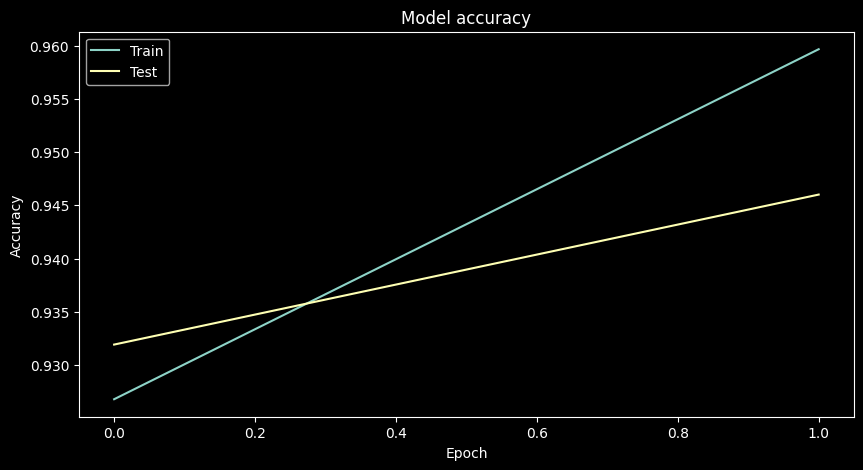

In [30]:
# Строим графики
plt.style.use(['dark_background'])
fig, ax = plt.subplots(figsize=(10, 5))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

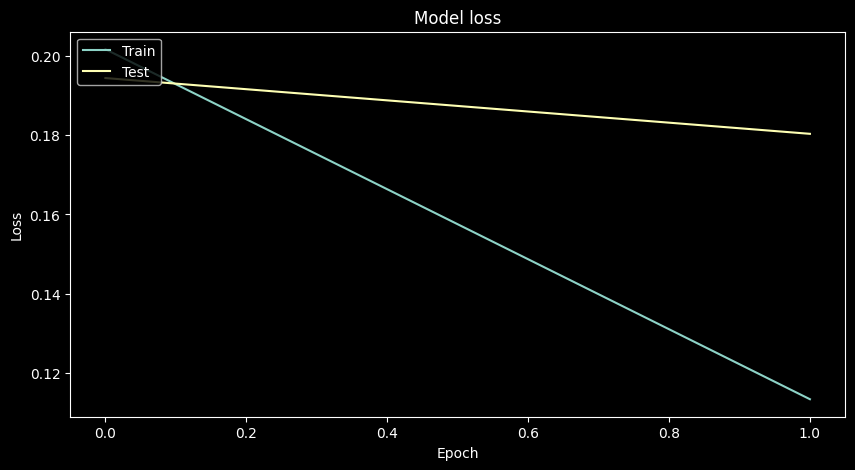

In [31]:

plt.style.use(['dark_background'])
fig, ax = plt.subplots(figsize=(10, 5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [32]:
# Извлечение пикселей из тестового датасета
X_val = test_df.iloc[:, 0:-1].values

X_val= X_val/255
X_val

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.00392157,
        0.        ],
       [0.        , 0.00392157, 0.01176471, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [33]:
from tensorflow.keras.models import load_model
model = load_model('/kaggle/working/best_model.hdf5')

In [34]:
# Преобразование пикселей в формат, подходящий для сверточной модели

X_val = np.reshape(X_val, (-1, 28, 28))
X_val = np.repeat((X_val / X_val.max()).astype("float32")[..., np.newaxis], 3, -1)
X_val = tf.image.resize(X_val, size=(112, 112))
# Предсказание классов для тестового датасета
predictions = model.predict(X_val)
predicted_classes = np.argmax(predictions, axis=1)
print(predicted_classes)

313/313 [==============================] - 30s 82ms/step
[0 1 2 ... 8 8 1]


In [35]:
# Создание DataFrame с предсказанными классами и Id
submission_df = pd.DataFrame({'Id': test_df['Id'], 'Category': predicted_classes})
submission_df

,Id,Category
0,0,0
1,1,1
2,2,2
3,3,2
4,4,3
...,...,...
9995,9995,0
9996,9996,6
9997,9997,8
9998,9998,8


In [36]:
submission_df.to_csv('submission.csv',index=False)

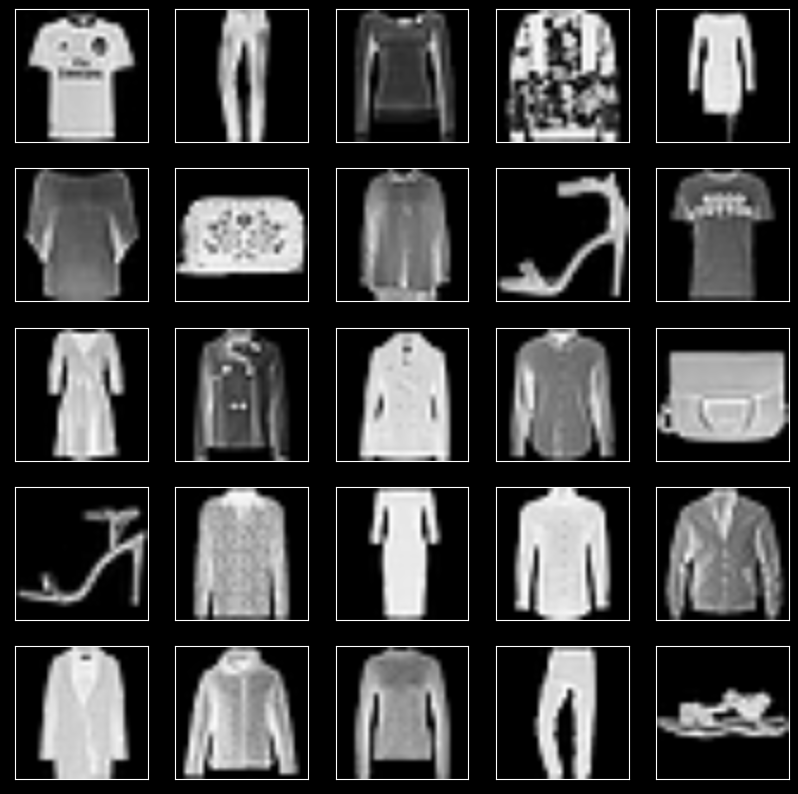

In [37]:
# Посмотрим примеры картинок из валидации
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    image = X_val[i]  
    plt.imshow(image)  # Отображаем картинку
  
plt.show()